<a href="https://colab.research.google.com/github/hoonZeee/Oss_2025/blob/main/YouTube.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Youtube API를 이용하여 영상 댓글 감정 분석하기



# Explanation
1. Youtube API를 이용하여 영상 불러오기
2. GPT로 유튜브 댓글 감정 분석
3. 그래프 시각화


In [ ]:
!pip install google-api-python-client youtube_transcript_api
!pip install openai==0.28

In [ ]:
!apt-get -qq install fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

#### 폰트 경로 설정

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl


font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
fontprop = fm.FontProperties(fname=font_path, size=12)


mpl.rc('font', family=fontprop.get_name())
mpl.rcParams['axes.unicode_minus'] = False

#### Youtube API

In [ ]:
from googleapiclient.discovery import build

YOUTUBE_API_KEY = "OSS class is good!"
youtube = build('youtube', 'v3', developerKey=YOUTUBE_API_KEY)

def get_video_comments(video_id, max_results=50):
    comments = []
    request = youtube.commentThreads().list(
        part="snippet",
        videoId=video_id,
        maxResults=min(max_results, 100),
        textFormat="plainText"
    )
    response = request.execute()

    for item in response["items"]:
        comment = item["snippet"]["topLevelComment"]["snippet"]["textDisplay"]
        comments.append(comment)

    return comments


#### OpenAI API

In [ ]:
import openai
openai.api_key = "oss class is good!!!"

def analyze_sentiment(comment):
    prompt = f"다음 댓글의 감정을 분류해줘. 긍정 / 부정 / 중립 중 하나로만 답해줘:\n\"{comment}\""
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=[{"role":"user", "content": prompt}],
        temperature=0
    )
    return response.choices[0].message['content'].strip()


## 감정 정제 함수 (그래프 출력 조정을 위함)

In [ ]:
def clean_sentiment(raw_sentiment):
    if "부정" in raw_sentiment or "Negative" in raw_sentiment:
        return "부정"
    elif "중립" in raw_sentiment or "Neutral" in raw_sentiment:
        return "중립"
    elif "긍정" in raw_sentiment or "Positive" in raw_sentiment:
        return "긍정"
    else:
        return "기타"

## 감정 결과 집계 및 시각화

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

def plot_sentiment_results(sentiments):
    count = Counter(sentiments)
    labels = count.keys()
    values = count.values()

    plt.figure(figsize=(5, 4))
    plt.bar(labels, values)
    plt.title("댓글 감정 분석 결과")
    plt.ylabel("댓글 수")
    plt.show()


In [ ]:
def plot_sentiment_results(sentiments):
    count = Counter(sentiments)
    labels = list(count.keys())
    values = list(count.values())

    plt.figure(figsize=(10, 6))
    bars = plt.bar(labels, values, color='skyblue', edgecolor='gray', linewidth=1.2)

    # 타이틀 & 축
    plt.title("댓글 감정 분석 결과", fontproperties=fontprop, fontsize=16, weight='bold')
    plt.xlabel("감정", fontproperties=fontprop, fontsize=13)
    plt.ylabel("댓글 수", fontproperties=fontprop, fontsize=13)

    plt.xticks(fontproperties=fontprop, fontsize=12)
    plt.yticks(np.arange(0, max(values)+1, 1), fontproperties=fontprop, fontsize=12)

    # 수치 라벨 표시
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, f'{int(yval)}',
                 ha='center', va='bottom', fontproperties=fontprop, fontsize=11)

    # 보조선 추가
    plt.grid(axis='y', linestyle='--', alpha=0.6)

    plt.tight_layout()
    plt.show()


https://www.youtube.com/watch?v=Jm94j_Ohle0 영상입니다.

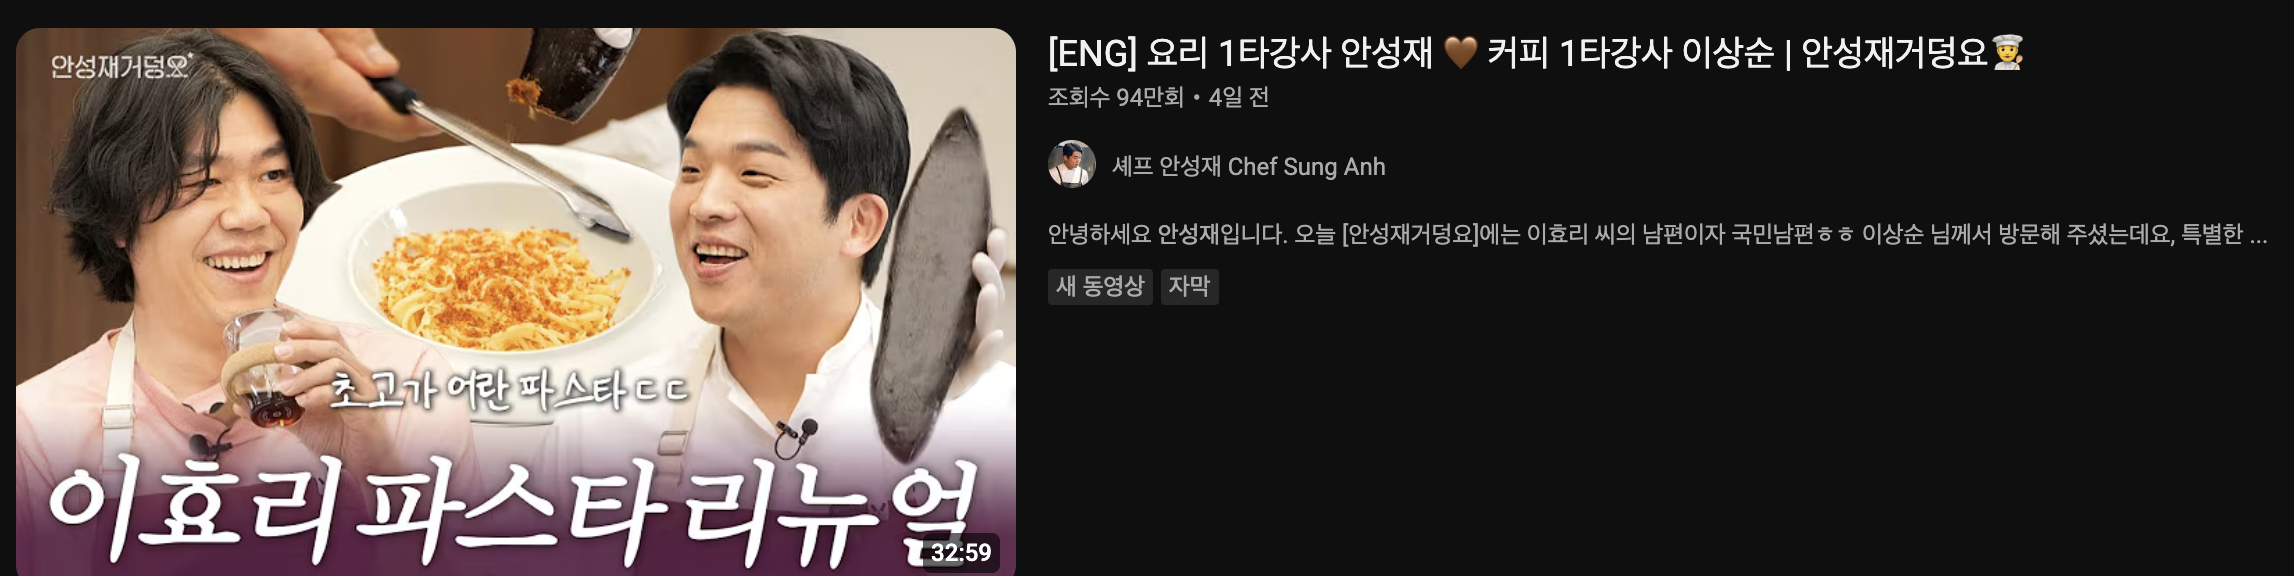

In [ ]:
from IPython.display import Image, display

display(Image(filename="screenshot.png"))

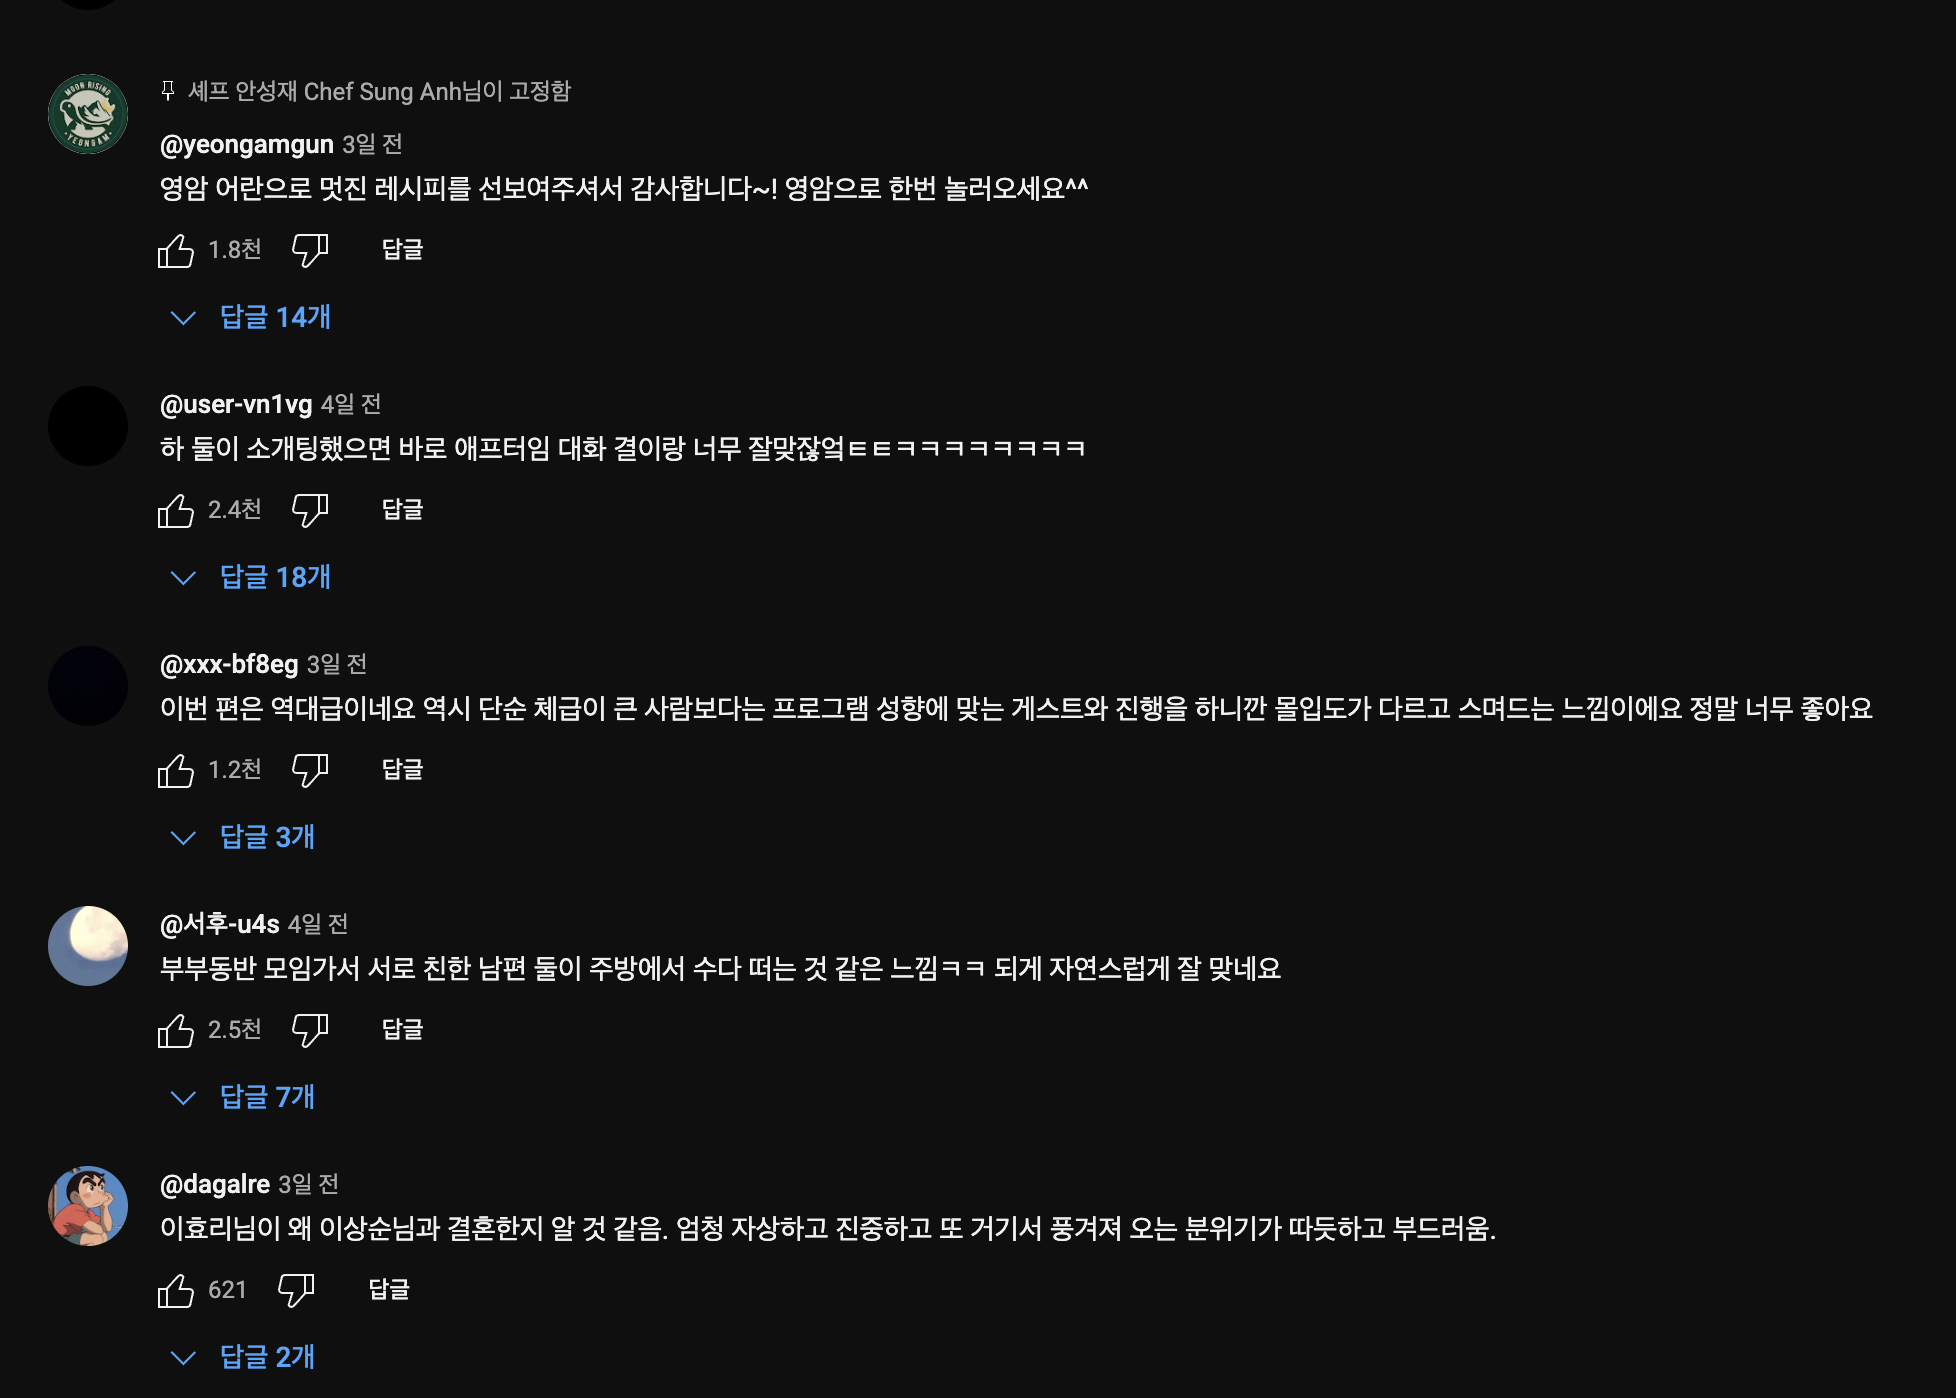

In [ ]:
from IPython.display import Image, display

display(Image(filename="screenshot2.png"))

## 댓글 감정 분석

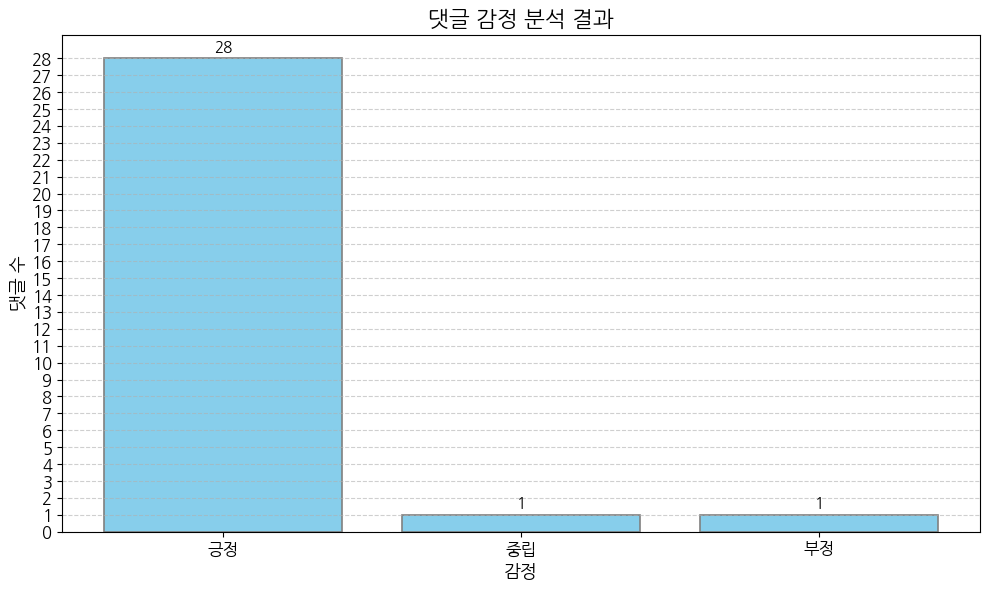

In [ ]:
from urllib.parse import urlparse, parse_qs

def extract_video_id(url):
    parsed_url = urlparse(url)
    query = parse_qs(parsed_url.query)
    return query["v"][0]

video_url = "https://www.youtube.com/watch?v=Jm94j_Ohle0"
video_id = extract_video_id(video_url)
comments = get_video_comments(video_id, max_results=30)

results = []
for c in comments:
    raw = analyze_sentiment(c)
    cleaned = clean_sentiment(raw)
    results.append(cleaned)

plot_sentiment_results(results)

## 해당 영상은 단순 분석을 위한 인기 영상일 뿐이며, 어떠한 부정적인 의도도 없습니다.

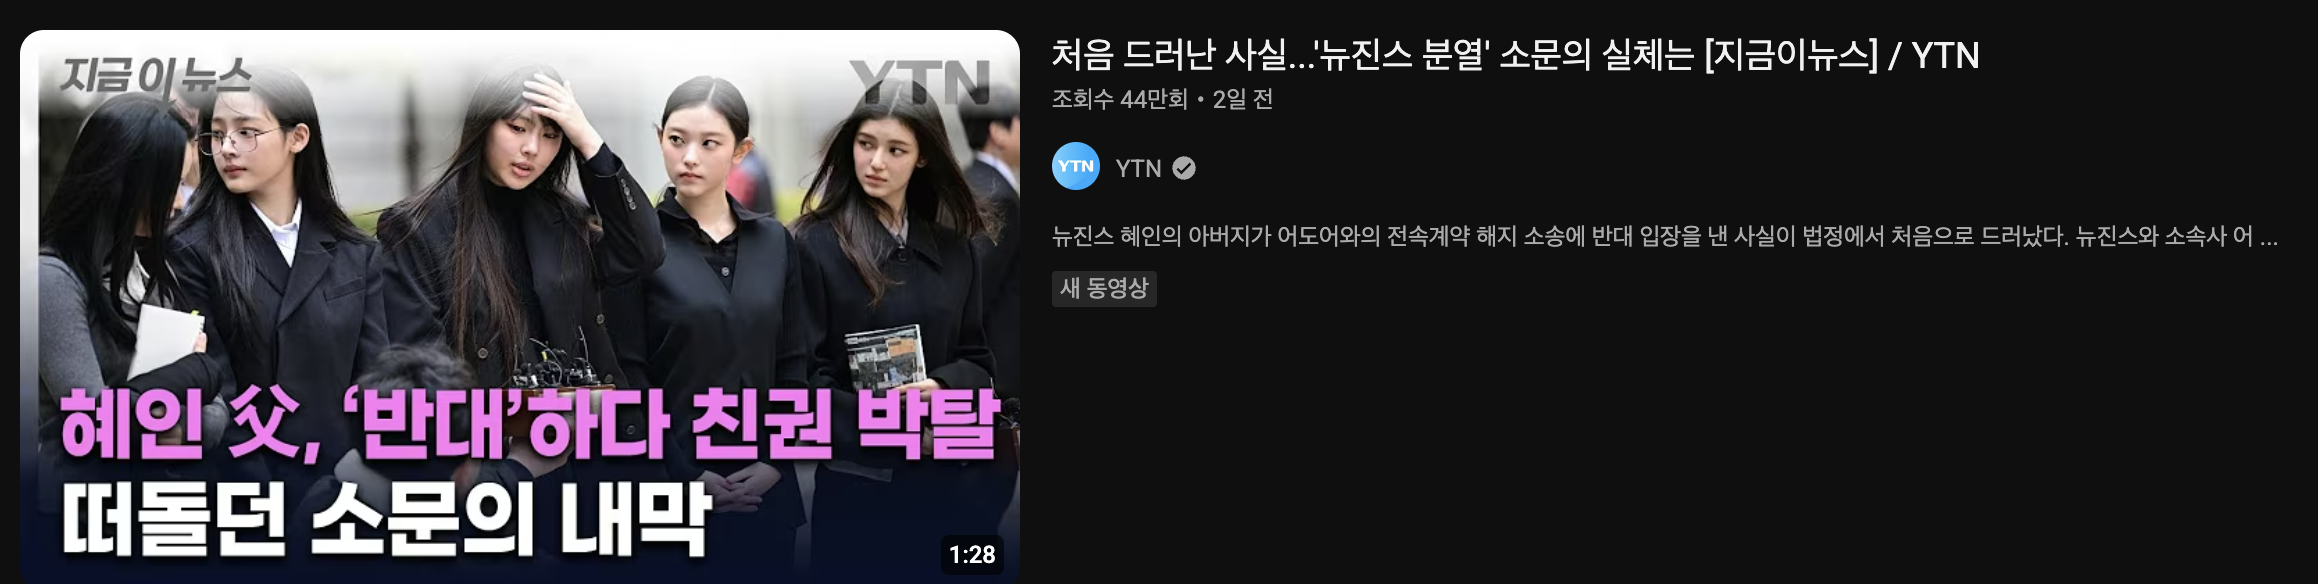

In [ ]:
from IPython.display import Image, display

display(Image(filename="sc3.png"))

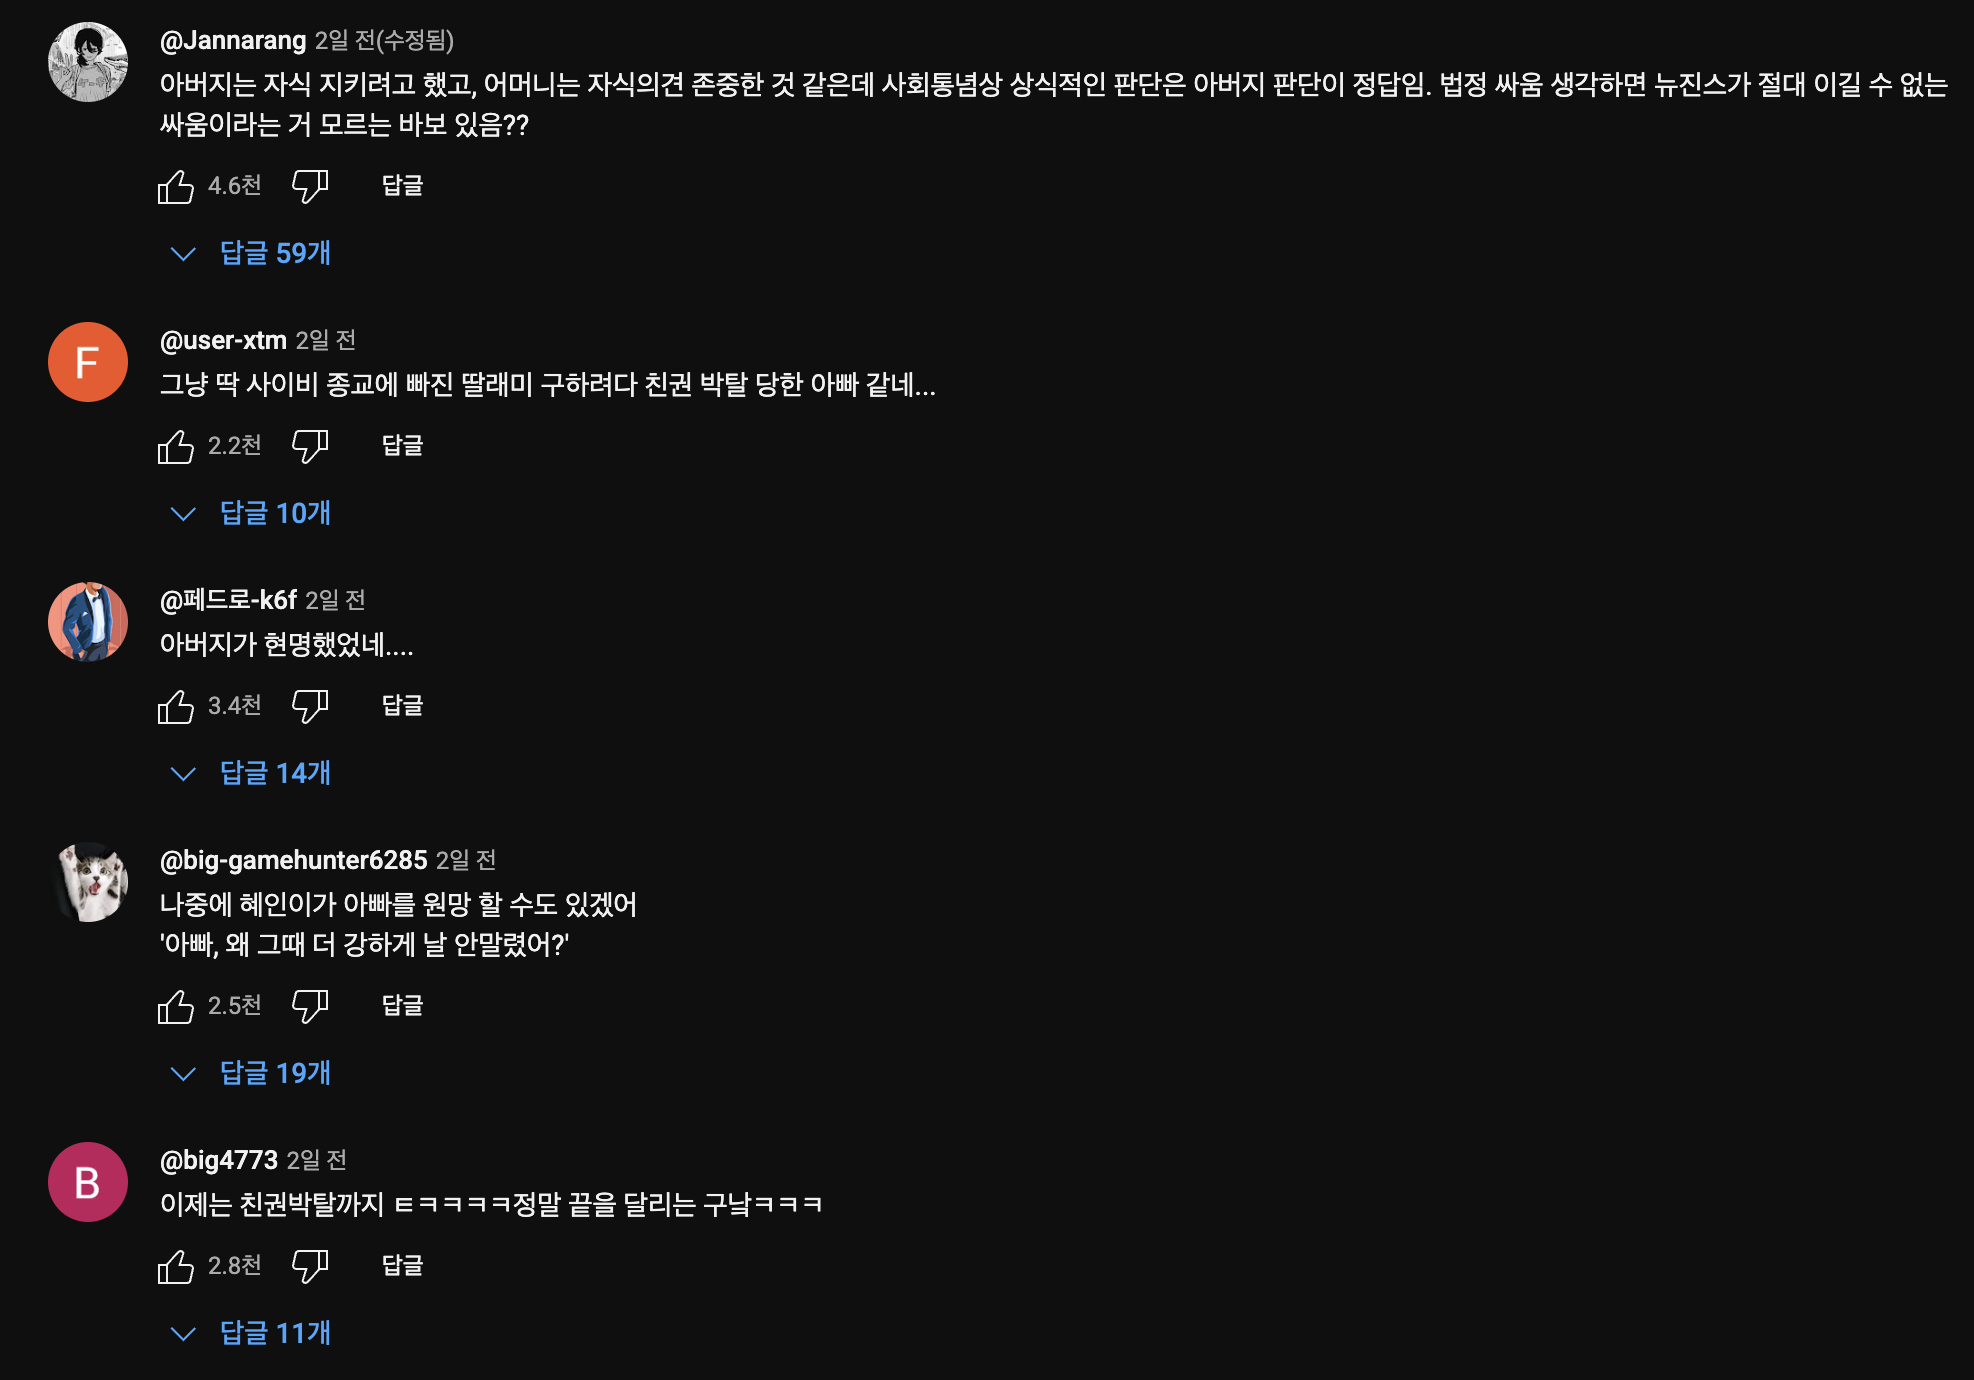

In [ ]:
from IPython.display import Image, display

display(Image(filename="sc4.png"))

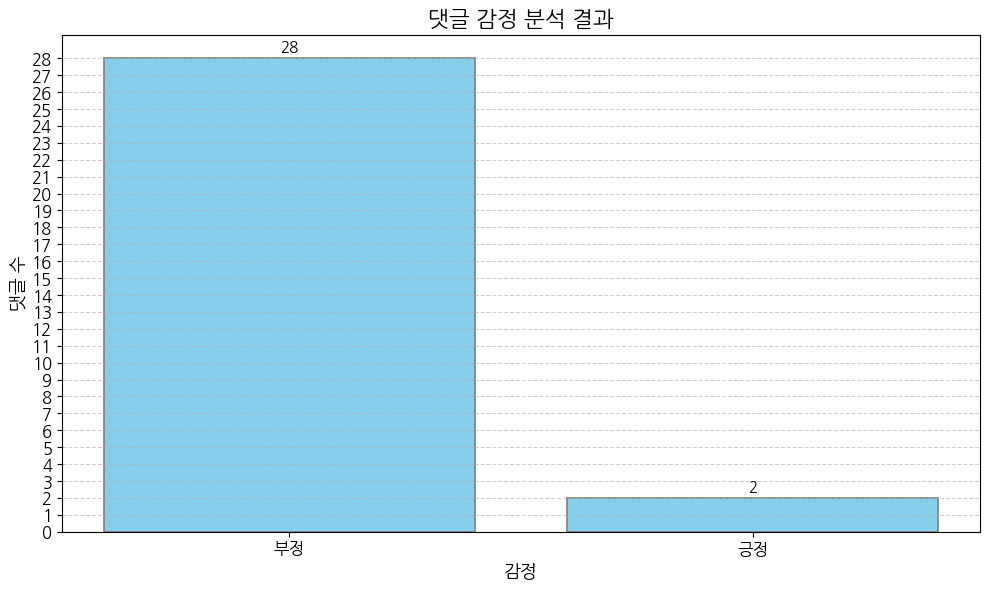

In [ ]:
from urllib.parse import urlparse, parse_qs

def extract_video_id(url):
    parsed_url = urlparse(url)
    query = parse_qs(parsed_url.query)
    return query["v"][0]

video_url = "https://www.youtube.com/watch?v=QcI9UuDiWZ8"
video_id = extract_video_id(video_url)
comments = get_video_comments(video_id, max_results=30)

results = []
for c in comments:
    raw = analyze_sentiment(c)
    cleaned = clean_sentiment(raw)
    results.append(cleaned)

plot_sentiment_results(results)